## Import Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Keras_Regression

/content/drive/MyDrive/Keras_Regression


In [4]:
data = pd.read_csv("Regression_Data.csv")

In [5]:
data

,Ind_Data,Dependent_Data
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [6]:
X = data['Ind_Data'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y = data['Dependent_Data'].values.reshape(-1,1)
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]])

## Visualize the data

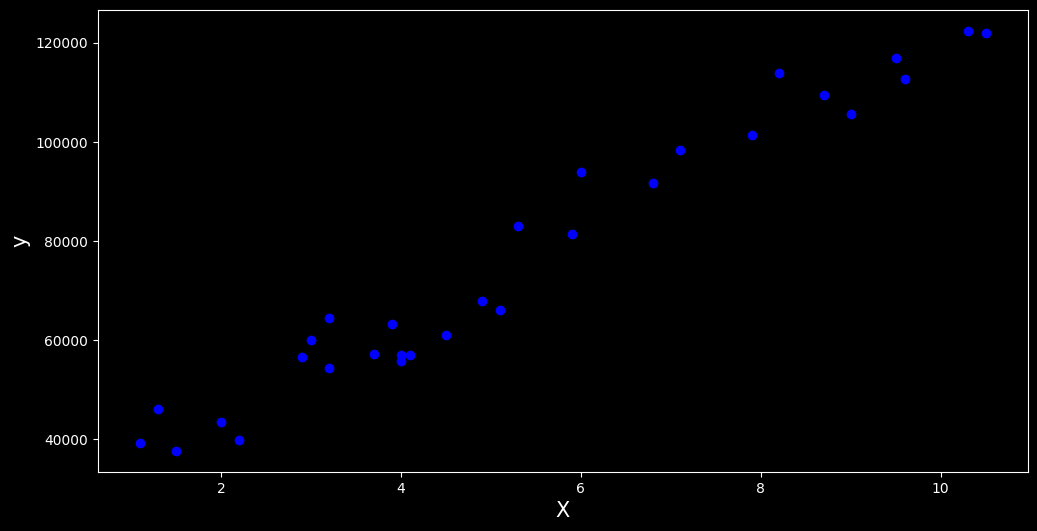

In [8]:
plt.figure(figsize =(12,6))
plt.scatter(X, y,color = 'b')
plt.ylabel('y', fontsize = 15)
plt.xlabel('X', fontsize = 15);

## Create Neural Network Model

In [9]:
model = Sequential()

model.add(Dense(units = 1, input_shape = (1,), activation = None)) # activations = None since the model is linear

# units = 1 means output dimension is one.
# input_shape = 1 means one input feature.

In [10]:
model.summary() # There are two parameters to train. One is weight and one is bias

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Setting the Parameters

In [11]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001) ,loss='mse')

# Training the Neural Network

In [12]:
history = model.fit(X,y, epochs = 5001)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 46100200.0000
Epoch 2503/5001
1/1 [==============================] - 0s 9ms/step - loss: 46087652.0000
Epoch 2504/5001
1/1 [==============================] - 0s 9ms/step - loss: 46075116.0000
Epoch 2505/5001
1/1 [==============================] - 0s 9ms/step - loss: 46062600.0000
Epoch 2506/5001
1/1 [==============================] - 0s 7ms/step - loss: 46050092.0000
Epoch 2507/5001
1/1 [==============================] - 0s 11ms/step - loss: 46037588.0000
Epoch 2508/5001
1/1 [==============================] - 0s 14ms/step - loss: 46025088.0000
Epoch 2509/5001
1/1 [==============================] - 0s 12ms/step - loss: 46012596.0000
Epoch 2510/5001
1/1 [==============================] - 0s 9ms/step - loss: 46000144.0000
Epoch 2511/5001
1/1 [==============================] - 0s 10ms/step - loss: 45987684.0000
Epoch 2512/5001
1/1 [==============================] - 0s 13ms/step - 

# Plotting Loss Vs Epochs

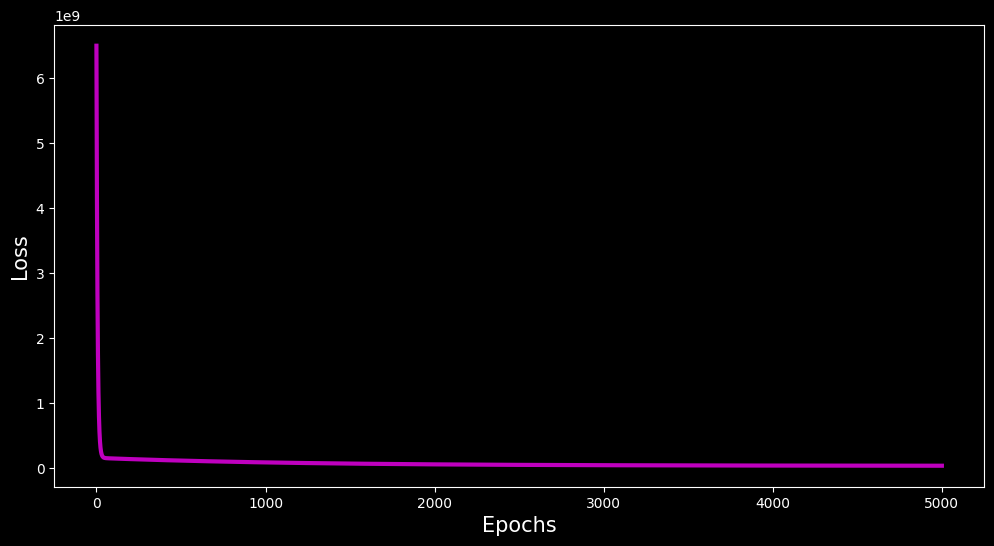

In [13]:
plt.figure(figsize =(12,6))
plt.plot(history.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

# Weight and Bias of the Trained Model

In [14]:
print("Weight is :" )
print(model.layers[0].get_weights()[0])

print(" ")

print("Bias is :" )
print(model.layers[0].get_weights()[1])

Weight is :
[[9876.7]]
 
Bias is :
[22916.531]


# Creating a test data

In [15]:
test_data = np.linspace(0,11,30).reshape(-1,1)

In [16]:
yt = model.predict(test_data)
yt

1/1 [==============================] - 0s 90ms/step


array([[ 22916.531],
       [ 26662.865],
       [ 30409.2  ],
       [ 34155.535],
       [ 37901.867],
       [ 41648.203],
       [ 45394.54 ],
       [ 49140.875],
       [ 52887.207],
       [ 56633.543],
       [ 60379.875],
       [ 64126.21 ],
       [ 67872.55 ],
       [ 71618.88 ],
       [ 75365.22 ],
       [ 79111.55 ],
       [ 82857.88 ],
       [ 86604.22 ],
       [ 90350.555],
       [ 94096.89 ],
       [ 97843.22 ],
       [101589.555],
       [105335.89 ],
       [109082.23 ],
       [112828.555],
       [116574.89 ],
       [120321.234],
       [124067.57 ],
       [127813.9  ],
       [131560.23 ]], dtype=float32)

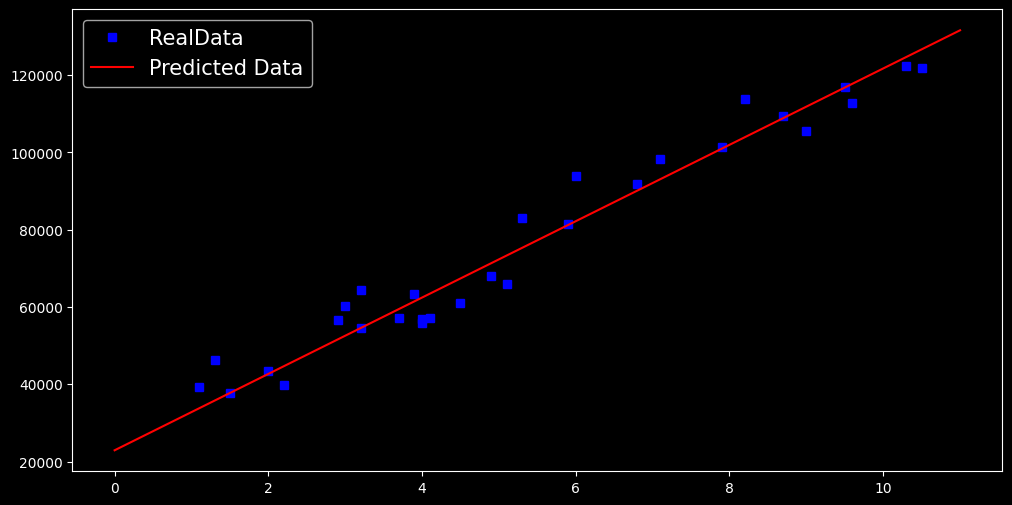

In [17]:
plt.figure(figsize =(12,6))
plt.plot(X, y,'bs',label = 'RealData')
plt.plot(test_data, yt, 'r', label = 'Predicted Data')
plt.legend(fontsize = 15)
plt.show()

# Check the Performance of the Model

In [18]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, yt)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y, yt)))
print('R2:', metrics.r2_score(y, yt))

RMSE: 9997.565361251989
MAE: 92.34510151295248
R2: 0.8624206266720289
